In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


### Data Collection and Processing 

In [2]:
data = pd.read_csv('train_loan_pred.csv')


In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# number of rows and columns 

data.shape # this is a very small dataset

(614, 13)

In [5]:
#statistical measures from dataset
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# number of missing values in each column
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
data['Gender'].value_counts()#.unique()

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [9]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [10]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [11]:
#loan amount is numberical data type
data['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [12]:

data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [13]:
#Credit_History
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [14]:
data = data.dropna()

In [15]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
#label encoding
data.replace({"Loan_Status":{'N':0,'Y':1}},inplace = True)


In [17]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [18]:
data.replace({"Gender":{'Male':0,'Female':1}},inplace = True)

In [19]:
data.replace({"Married":{'No':0,'Yes':1}},inplace = True)

In [20]:
data['Education'].value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

In [21]:
data.replace({"Education":{'Not Graduate':0,'Graduate':1}},inplace = True)

In [22]:
data.replace({"Self_Employed":{'No':0,'Yes':1}},inplace = True)

In [23]:
data.replace({"Property_Area":{'Rural':0,'Urban':1,'Semiurban':2}},inplace = True)

In [24]:
data = data.replace(to_replace = '3+', value = 4) 

#### Converting categorical column 'Dependents' to Numerical 

In [ ]:
data['Dependents'].value_counts()


In [26]:
data['Dependents']=data['Dependents'].astype(int)

In [27]:
data['Property_Area'].value_counts()

2    191
1    150
0    139
Name: Property_Area, dtype: int64

In [28]:
data['Property_Area']=data['Property_Area'].astype(int)

In [29]:
data['Dependents'].dtype

dtype('int64')

In [30]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


### Data Visualization

<AxesSubplot:xlabel='Education', ylabel='count'>

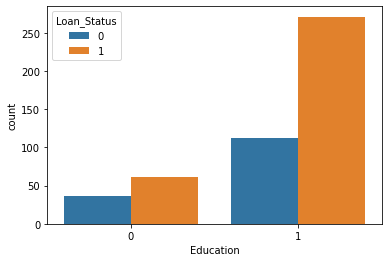

In [31]:
sns.countplot(x='Education',hue='Loan_Status', data = data)

<AxesSubplot:xlabel='Married', ylabel='count'>

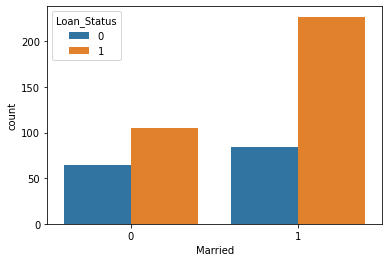

In [32]:
# marital status and loan status
sns.countplot(x='Married',hue='Loan_Status', data = data)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

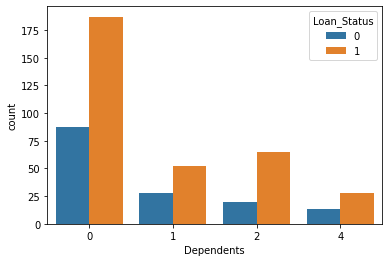

In [33]:
sns.countplot(x='Dependents',hue='Loan_Status', data = data)

### Seperating X and Y variables

In [34]:
X = data.drop(columns = ['Loan_ID', 'Loan_Status'],axis =1)
Y = data['Loan_Status']

In [35]:
X.shape
#Y.shape

(480, 11)

### Train Test Split

In [44]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.1, stratify=Y,random_state=1)

In [45]:
print(X.shape, Y.shape)

(480, 11) (480,)


### Training the model using Support Vector Machine Model

In [46]:
classifier = svm.SVC(kernel ='linear')

In [47]:
#training th support vector machine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

### Model Evaluation 

In [42]:
x_train_pred= classifier.predict(X_train)
training_data_accuracy = accuracy_score(x_train_pred,Y_train)
print("accuracy score for train data is",training_data_accuracy) 

accuracy score for train data is 0.7731481481481481


In [43]:
x_test_pred= classifier.predict(X_test)
test_data_accuracy = accuracy_score(x_test_pred,Y_test)
print("accuracy score for test data is",test_data_accuracy) 

accuracy score for train data is 0.75


##### df_z_scaled = df.copy()
  
##### # apply normalization techniques
##### for column in df_z_scaled.columns:
#####    df_z_scaled[column] = (df_z_scaled[column] -
#####                           df_z_scaled[column].mean()) / df_z_scaled[column].std()    
  
##### # view normalized data   
##### display(df_z_scaled)

In [98]:
data_normal = data.copy()

In [99]:
type(data_normal)

pandas.core.frame.DataFrame

In [100]:
data_normal.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [101]:
data_normal = data_normal.drop(columns = ['Loan_ID'],axis =1)

In [102]:
data_normal.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [107]:
data_normal.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [108]:
X_norm = data_normal.drop(columns = ['Loan_Status'],axis =1)
Y_norm = data_normal['Loan_Status']

In [109]:
for column in X_norm.columns:
    X_norm[column] = (X_norm[column] - X_norm[column].mean()) / X_norm[column].std()
    

In [110]:
data_normal.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [111]:
X_train_norm,X_test_norm,Y_train_norm,Y_test_norm= train_test_split(X_norm,Y_norm,test_size=0.1, stratify=Y,random_state=1)

In [112]:
Y_norm.head(20)

1     0
2     1
3     1
4     1
5     1
6     1
7     0
8     1
9     0
10    1
12    1
13    0
14    1
15    1
17    0
18    0
20    0
21    1
22    0
25    1
Name: Loan_Status, dtype: int64

In [113]:
classifier_norm = svm.SVC(kernel ='linear')
classifier_norm.fit(X_train_norm,Y_train_norm)

SVC(kernel='linear')

In [115]:
x_train_pred_norm= classifier_norm.predict(X_train_norm)
training_data_accuracy_norm = accuracy_score(x_train_pred_norm,Y_train_norm)
print("accuracy score for normalized train data is",training_data_accuracy_norm) 

accuracy score for normalized train data is 0.8055555555555556


In [117]:
x_test_pred_norm= classifier_norm.predict(X_test_norm)
test_data_accuracy_norm = accuracy_score(x_test_pred_norm,Y_test_norm)
print("accuracy score normalized for test data is",test_data_accuracy_norm) 

accuracy score normalized for test data is 0.8333333333333334
